# Analyse historical data from the Climate Change Knowledge Portal 

Author: [Giuseppe La Rocca] (mailto: giuseppe.larocca@egi.eu)

Creation date: 03-Sept-2019

Last updated: 04-Sept-2019

---

## Exercise: 

Calculate the historical precipitation data derived from the Climate Research Unit (Mitchell et at, 2003) aggregated to country and basin levels.

* Visit the [World Data Catalogue](https://datacatalog.worldbank.org/dataset/climate-change-knowledge-portal-historical-data)
* Click on the "Data & Resources" tab
* Download a copy of the "Climate Chnage Knowledge Portal: Historical Data" and safe the .xls spreadsheet in your computer
* Upload the .xls spreadsheet in the Notebook user's workspace

The "Climate Chnage Knowledge Portal: Historical Data" spreadsheet contains the following tabs:

* <u>Country_temperatureCRU</u>: mean monthly and annual temperatures by country for the period 1961-1999.  Values are in degrees Celsius.
* <u>Country_precipitationCRU</u>: mean monthly and annual precipitation by country for the period 1961-1999.  Values are in millimeters (mm).

For this exercise the dataset in the <u>Country_temperatureCRU</u> tab will be used.


## Import necessary libraries

In [13]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

### Provide the ISO_3DIGIT of the country you are interested to analyse

In [14]:
ISO_3DIGIT="ITA"

## Load historical datasets from local and create a DataFrame object

In [15]:
raw_data = pd.read_excel('./cckp_historical_data_0.xls', sheet_name='Country_temperatureCRU')

### Show keys() and datasets

In [16]:
# Show available keys()
raw_data.keys()

Index(['ISO_3DIGIT', 'Jan_Temp', 'Feb_temp', 'Mar_temp', 'Apr_Temp',
       'May_temp', 'Jun_Temp', 'July_Temp', 'Aug_Temp', 'Sept_temp',
       'Oct_temp', 'Nov_Temp', 'Dec_temp', 'Annual_temp'],
      dtype='object')

In [17]:
raw_data[:10]

,ISO_3DIGIT,Jan_Temp,Feb_temp,Mar_temp,Apr_Temp,May_temp,Jun_Temp,July_Temp,Aug_Temp,Sept_temp,Oct_temp,Nov_Temp,Dec_temp,Annual_temp
0,AFG,0.073058,2.109406,7.596974,13.370239,18.216310,23.201315,25.258537,23.766517,19.034575,12.992646,7.004094,2.433517,12.921455
1,AGO,22.582236,22.683536,22.784139,22.353582,20.739575,18.373315,17.946175,19.902466,22.187548,23.181599,22.786151,22.610858,21.510933
2,ALB,2.023067,3.218058,6.035317,9.917867,14.442750,17.927750,20.538917,20.479667,17.159083,12.265775,7.575808,3.653617,11.269800
3,ARE,18.427522,19.428044,22.612913,26.578435,30.623652,32.457087,33.796130,33.550869,31.743130,28.343218,24.061783,20.283739,26.825609
4,ARG,20.803533,19.899523,17.514634,14.046284,10.647732,7.657256,7.421399,9.015955,11.529476,14.674651,17.544032,19.828148,14.215225
5,ARM,-8.663131,-6.652077,-0.566410,6.619723,11.432308,15.579385,19.819307,19.284308,14.970000,7.922046,1.618720,-4.872554,6.374362
6,AUS,27.784496,27.229410,25.368697,21.874739,17.858305,14.832909,13.954677,15.707861,18.890749,22.457086,25.127116,26.994101,21.506676
7,AUT,-3.516328,-1.985213,1.418378,5.509071,10.118082,13.286418,15.255667,14.979069,12.092438,7.550790,1.733680,-2.209830,6.186013
8,AZE,-0.200881,0.803707,4.970370,11.643364,16.801467,21.729355,24.763133,24.111133,19.831755,12.881762,7.325707,2.032077,12.224344
9,BDI,20.243000,20.388000,20.429700,20.368500,20.046100,19.372300,19.356400,20.443000,21.159100,20.983400,20.239100,20.165700,20.266100


### Group datasets based on the "ISO_3DIGIT" code and check data structure

In [18]:
average_annual_temperature = raw_data.groupby(['ISO_3DIGIT'])
#average_annual_temperature.describe()

In [19]:
# Filter datasets by ISO_3DIGIT
iso_3digit_average_annual_temperature = average_annual_temperature.get_group(ISO_3DIGIT)
iso_3digit_average_annual_temperature

,ISO_3DIGIT,Jan_Temp,Feb_temp,Mar_temp,Apr_Temp,May_temp,Jun_Temp,July_Temp,Aug_Temp,Sept_temp,Oct_temp,Nov_Temp,Dec_temp,Annual_temp
79,ITA,3.318792,4.34936,6.522076,9.612692,13.777579,17.524698,20.305087,20.144344,17.185813,12.856856,8.012446,4.398412,11.500694


### Create the DataFrame to plot

In [23]:
Data = {
    'Mean monthly and annual temperature for period 1961-1999': [
          'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'
    ],
    
    'Temperatures': [
          iso_3digit_average_annual_temperature['Jan_Temp'].values[0],
          iso_3digit_average_annual_temperature['Feb_temp'].values[0],
          iso_3digit_average_annual_temperature['Mar_temp'].values[0],
          iso_3digit_average_annual_temperature['Apr_Temp'].values[0],
          iso_3digit_average_annual_temperature['May_temp'].values[0],
          iso_3digit_average_annual_temperature['Jun_Temp'].values[0],
          iso_3digit_average_annual_temperature['July_Temp'].values[0],
          iso_3digit_average_annual_temperature['Aug_Temp'].values[0],
          iso_3digit_average_annual_temperature['Sept_temp'].values[0],
          iso_3digit_average_annual_temperature['Oct_temp'].values[0],
          iso_3digit_average_annual_temperature['Nov_Temp'].values[0],
          iso_3digit_average_annual_temperature['Dec_temp'].values[0]
    ]
}

data_frame=DataFrame(Data, columns=['Mean monthly and annual temperature for period 1961-1999', 'Temperatures'])
data_frame

,Mean monthly and annual temperature for period 1961-1999,Temperatures
0,Jan,3.318792
1,Feb,4.349360
2,Mar,6.522076
3,Apr,9.612692
4,May,13.777579
5,Jun,17.524698
6,Jul,20.305087
7,Aug,20.144344
8,Sept,17.185813
9,Oct,12.856856


### Plot the DataFrame 

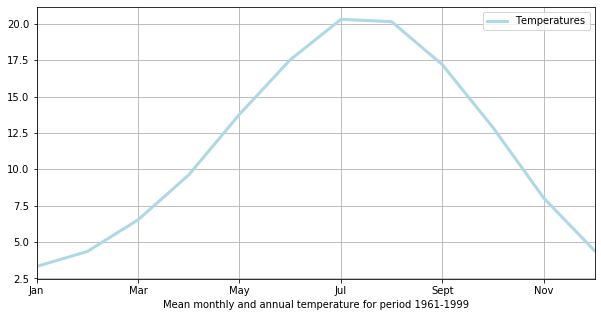

In [24]:
data_frame.plot(
    x='Mean monthly and annual temperature for period 1961-1999', 
    y='Temperatures',
    color='lightblue', 
    figsize=(10,5),
    linewidth='3')

# Add legend, grid and show the plot
plt.grid()
plt.legend()

# Saving the final plot
plt.savefig("temperatures.png")